<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Sigmoid_Neuron/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

#PLotting 2D sigmoid

The equation ofa sigmoid function is:


**$\sigma_{w,b}(x)=\frac{1}{1+e^{-wx+ b }}$**

In [0]:
def sig_2D(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
sig_2D(1,2,2)

0.9820137900379085

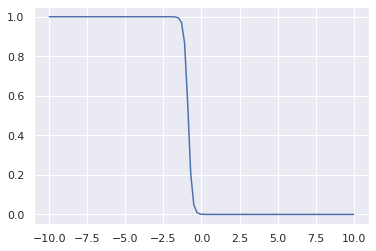

In [0]:
b=-1.5     #@param {type: "slider", min: -10, max: 10,step:0.5}
w=-1     #@param {type: "slider", min: -20, max: 20, step: 0.5}
X=np.linspace(-10,10,100)
Y=sig_2D(X,w,b)
plt.plot(X,Y)
plt.show()

#Plotting 3D Sigmoid

$\sigma_{W,b}(X)=\frac{1}{1+e^{-(\sum_i w_ix_i+b)}}$

In [0]:
def sig_3D(X,W,b):
  result=0
  for x,w in zip(X,W):
    result += np.sum(w*x)
  return 1/(1+(np.exp(-(result+b))))


In [0]:
X=np.array(([1,10],[2,20]))
W=np.array(([1,1],[0.1,0.1]))
b=2

In [0]:
result_f=sig_3D(X,W,b)
print(result_f)
print(np.ndim(result_f))

0.9999997495484255
0


As the result is coming as a scalar, hence the function defining procedure is wrong.

Let's correct the function again

In [0]:
def sig_3D(X,W,b):
    return 1/(1+(np.exp(-(W*X+b))))
# In this case the multiplication ill be element wise and it wwon't create any problem for multi dimensional tensor.

In [0]:
result=sig_3D(X,W,b)
print(result)
print(np.ndim(result))

[[0.95257413 0.99999386]
 [0.90024951 0.98201379]]
2


This is the correct output for the given input.

Now let's draw a surface plot for this.

In [0]:
from mpl_toolkits import mplot3d

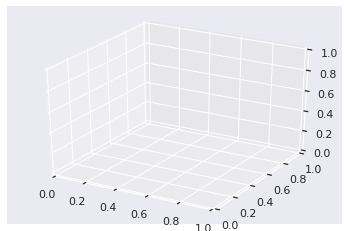

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')

We need to create two vectors along the two axes and should create a meshgrid out of them

In [0]:
x1=np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)
X_1,X_2=np.meshgrid(x1,x2)#np.meshgrid() Return coordinate matrices from coordinate vectors. So to access the first matrix we have assign X_1 and X_2.

# X_1 and X_2 both has the same elements. We can use any one of them to create the function evaluation.

In [0]:
Y=sig_3D(X_1,0.5,0)
print(Y)

[[0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 ...
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]]


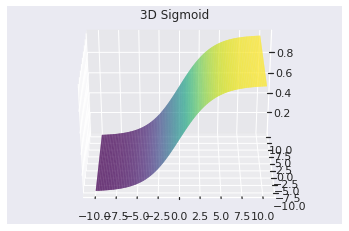

In [0]:
ax = plt.axes(projection='3d')
ax.plot_surface(X_1,X_2,Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3D Sigmoid')
ax.view_init(30,270)

#Task_Contourf and Loss_Function
Date: 22.11.2019

Till now we have given a 2D tensor as X and W input to the sigmoid function and calculated the output as Y and plotted a 3D surface plot for Y vs X1 and X2. But Y is computed for X1 only.

Now we will compute Y for both X1 and X2 and will have a 3D surface plot for Y vs. X1 and X2. Y need to be a 2D tensor and X1 and X2 should also be a 2D tensor each.

So today we will do the following task.

1. Define a sigmoid function from two X tensors.
2. Plot the corresponding 3D plot of the Y vs (X1 and X2)
3. Compute the Loss and PLot the Loss vs (w and b)
4. plot the contour plot of Y vs (X1 and X2)



In [0]:
#definig the sigmoid function
def sigmoid_3D_test(X1,X2,W1,W2,b):
  return 1/(1+np.exp(-(W1*X1+W2*X2)+b))

In [0]:
#define X1 and X2
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X1_g,X2_g=np.meshgrid(X1,X2)
Y=sigmoid_3D_test(X1_g,X2_g,0.5,0.5,1)


In [0]:
print(Y)
print(X1_g.shape)
print(type(X1_g))
print(Y.shape)

[[1.67014218e-05 1.84765467e-05 2.04403384e-05 ... 2.31116029e-01
  2.49550680e-01 2.68941421e-01]
 [1.84765467e-05 2.04403384e-05 2.26128482e-05 ... 2.49550680e-01
  2.68941421e-01 2.89258118e-01]
 [2.04403384e-05 2.26128482e-05 2.50162583e-05 ... 2.68941421e-01
  2.89258118e-01 3.10457825e-01]
 ...
 [2.31116029e-01 2.49550680e-01 2.68941421e-01 ... 9.99815183e-01
  9.99832937e-01 9.99848985e-01]
 [2.49550680e-01 2.68941421e-01 2.89258118e-01 ... 9.99832937e-01
  9.99848985e-01 9.99863492e-01]
 [2.68941421e-01 2.89258118e-01 3.10457825e-01 ... 9.99848985e-01
  9.99863492e-01 9.99876605e-01]]
(100, 100)
<class 'numpy.ndarray'>
(100, 100)


In [0]:
from mpl_toolkits import mplot3d

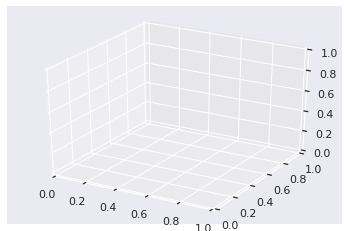

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Text(0.5, 0, 'Z')

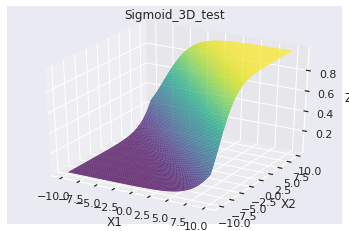

In [0]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1_g,X2_g,Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Sigmoid_3D_test')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
#ax.view_init(30,270)

Task:2

$Loss=\sum_i(y_i-\hat{y_i})^2$

where 

$\hat{y_i}=predicted\space output$ 

$y_i=ground \space truth$

In [0]:
#computing the loss from a X 
def sigmoid_test(X,W,b):
  return 1/(1+(np.exp(-(W*X+b))))

def loss_func(X,Y,W,b):
  loss=0
  Y_h=sigmoid_test(X,W,b)
  for y,y_h in zip (Y,Y_h):
    loss+=(y-y_h)**2
  return loss

In [0]:
# X=np.linspace(-10,10,100)
X = np.random.random(25) * 20 - 10

[0.98641024 0.41602913 0.89379431 0.02267138 0.02472844 0.32755768
 0.02148695 0.0089461  0.76145135 0.00764184 0.08086246 0.26974551
 0.43732051 0.98314018 0.02871954 0.00848523 0.67524589 0.30015734
 0.98987494 0.98931606 0.86354674 0.01308685 0.96447347 0.04441867
 0.63917365]


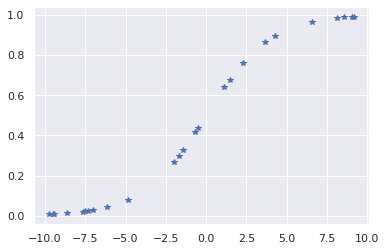

In [0]:
#Create a ground truth for all X
Y=sigmoid_test(X,0.5,0)
print(Y)
plt.plot(X,Y,'*')
plt.show()

In [0]:
#create a mshgrid of W and b and see the effect of change in their values over the loss function
W=np.linspace(0,1,101)
B=np.linspace(-1,1,101)
W_g,B_g=np.meshgrid(W,B)
print(W_g.shape,B_g.shape)

(101, 101) (101, 101)


In [0]:
#Let's create a null array for Loss values and compute the loss for every value of W in the meshgrid
Loss_matrix=np.zeros(W_g.shape)

# for l in range(W.shape[0]):

for i in range(W_g.shape[0]):
  for j in range(W_g.shape[1]):
    Loss_matrix[i,j]=loss_func(X,Y,W_g[i,j],B_g[i,j])
print(Loss_matrix)

[[4.48459345 4.26895848 4.05918124 ... 0.33240908 0.33437059 0.33638091]
 [4.45310614 4.235114   4.02323225 ... 0.32649801 0.3285657  0.33068047]
 [4.42212248 4.20177762 3.98779679 ... 0.32068066 0.32285261 0.32506994]
 ...
 [5.97658132 5.70096893 5.42796111 ... 0.25705525 0.25724707 0.25750565]
 [6.03533776 5.76159353 5.49015879 ... 0.26326426 0.26331645 0.26343693]
 [6.0943467  5.82250585 5.55268225 ... 0.26965258 0.26956373 0.26954467]]


In [0]:
print(Loss_matrix.shape)

(101, 101)


Text(0.5, 0, 'Loss')

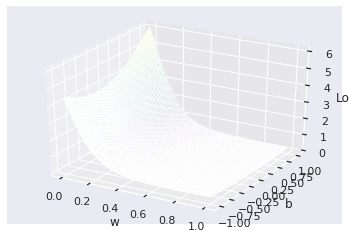

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W_g, B_g, Loss_matrix,rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

Task-3: Creation of a contour map


In [0]:
import matplotlib.colors

In [0]:
cmap_test = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])

In [0]:
#definig the sigmoid function
def sigmoid_3D_test(X1,X2,W1,W2,b):
  return 1/(1+np.exp(-(W1*X1+W2*X2)+b))

In [0]:
#define X1 and X2
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X1_g,X2_g=np.meshgrid(X1,X2)
Y=sigmoid_3D_test(X1_g,X2_g,0.5,0.5,0)


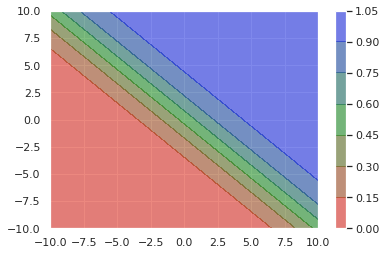

In [0]:
plt.contourf(X1_g,X2_g,Y,cmap=cmap_test,alpha=0.5)#alpha value determines the transperency of the colours
plt.colorbar()
plt.show()

Now by changing the value of w1 and w2 we can change the differences

Task completed

#Class_for_Sigmoid

In [0]:
class Sigmoid_Neuron:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b #we have taken the dot product of transpose of Weight matrix and the input vector just to avoid any size mismatch
  
  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,x,y,epochs=1,lr_rate=1,initialize=True):
    if initialize:    #if initialization is required then we will proceed for this otherwise we will proceed with the previous value of w and b
      self.w=np.random.randn(1,x.shape[1])
      self.b=0
 

    for i in range(epochs):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -=lr_rate*dw
      self.b -=lr_rate*db

#Ft for Toy Data

In [0]:
X=np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y=[1,1,1,0,0,0]

In [0]:
sn=Sigmoid_Neuron()#instantization of the class
sn.fit(X,Y,100,0.2,True)

In [0]:
#instead of running it for twenty epochs we are declaring the epochs from an outer for loop.
for i in range(20):
  sn.fit(X,Y,1,0.1,False)#as the initialzation is done previously, ther eis no need for reinitialization. So the intialize is stated 'False'
  print(sn.w,sn.b)


[[ 2.39211176 -0.7811562 ]] [-1.09985218]
[[ 2.39297124 -0.7814371 ]] [-1.10036095]
[[ 2.39382909 -0.78171748]] [-1.10086868]
[[ 2.39468534 -0.78199733]] [-1.1013754]
[[ 2.39553997 -0.78227666]] [-1.10188109]
[[ 2.396393   -0.78255547]] [-1.10238577]
[[ 2.39724444 -0.78283377]] [-1.10288944]
[[ 2.39809428 -0.78311154]] [-1.10339211]
[[ 2.39894254 -0.7833888 ]] [-1.10389377]
[[ 2.39978922 -0.78366555]] [-1.10439443]
[[ 2.40063432 -0.78394179]] [-1.1048941]
[[ 2.40147786 -0.78421752]] [-1.10539277]
[[ 2.40231984 -0.78449274]] [-1.10589046]
[[ 2.40316026 -0.78476745]] [-1.10638716]
[[ 2.40399913 -0.78504167]] [-1.10688289]
[[ 2.40483646 -0.78531538]] [-1.10737764]
[[ 2.40567224 -0.78558859]] [-1.10787141]
[[ 2.40650649 -0.7858613 ]] [-1.10836422]
[[ 2.40733922 -0.78613352]] [-1.10885606]
[[ 2.40817042 -0.78640524]] [-1.10934694]


Changing the learning rate of the fit function we can observe how the weight value varies.

Now Let's plot the contour plot for every epochs.
So we need to define another class for plotting the variables.

In [0]:
def plot_sigmoid(X,Y,sn):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  X1_g,X2_g=np.meshgrid(X1,X2)
  Y1_g=np.zeros(X1_g.shape)
  for i in range(X1.size):
    for j in range(X2.size):
      val=np.asarray([X2[j],X1[i]])#This altering indexing is important!!!!.......x coordinate is X2[j] and y coordinate is X1[i]
      Y1_g[i,j]=sn.sigmoid(sn.perceptron(val))
  plt.contourf(X1_g,X2_g,Y1_g,cmap=cmap_test,alpha=0.6)
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)#X[:,0] implies all row of 1st column
  plt.plot()
  plt.show()

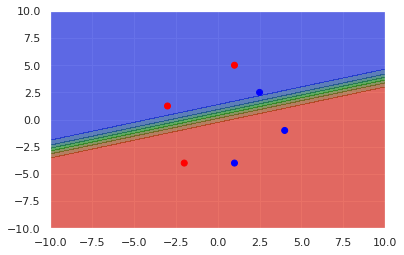

In [0]:
  plot_sigmoid(X,Y,sn)#We are just calling the class for plotting....its just for testing

Now let's plot the contour plot for every epoch.

To do that we have to create a subplot for plotting the result of each epoch. That's why we need to create a handler in the defined plotting class and modify it a little.

In [0]:
def plot_sigmoid(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  X1_g,X2_g=np.meshgrid(X1,X2)
  Y1_g=np.zeros(X1_g.shape)
  for i in range(X1.size):
    for j in range(X2.size):
      val=np.asarray([X2[j],X1[i]])
      Y1_g[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(X1_g,X2_g,Y1_g,cmap=cmap_test,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)#X[:,0] implies all row of 1st column
  ax.plot()
  # ax.show()

[[-1.73757337 -1.26263761]] [-0.00984575]
[[-1.68346936 -1.28471939]] [-0.0216998]
[[-1.61847772 -1.3103304 ]] [-0.03618742]
[[-1.53765118 -1.34137964]] [-0.05430935]
[[-1.4322747  -1.38116403]] [-0.07774238]
[[-1.28558248 -1.43588983]] [-0.10938146]
[[-1.06261057 -1.51799072]] [-0.153663]
[[-0.695766  -1.6482125]] [-0.20810919]
[[-0.17636204 -1.80648167]] [-0.1965386]
[[ 1.73108590e-04 -1.84253153e+00]] [-0.16652274]
[[ 0.07370516 -1.84512636]] [-0.15283783]
[[ 0.1272211  -1.83877183]] [-0.14202219]
[[ 0.17240608 -1.82665274]] [-0.13209208]
[[ 0.21387862 -1.80963881]] [-0.12221831]
[[ 0.25427096 -1.78774783]] [-0.11186987]
[[ 0.29558133 -1.76044288]] [-0.10057475]
[[ 0.33977512 -1.7266128 ]] [-0.0877963]
[[ 0.38925472 -1.68433845]] [-0.07281274]
[[ 0.44749086 -1.63034183]] [-0.05453262]
[[ 0.52019705 -1.55876622]] [-0.03114536]
[[ 0.61787752 -1.45834383]] [0.00058951]
[[ 0.76138413 -1.30573075]] [0.04652277]
[[ 0.98622689 -1.05600995]] [0.11210389]
[[ 1.26596144 -0.69137317]] [0.14603

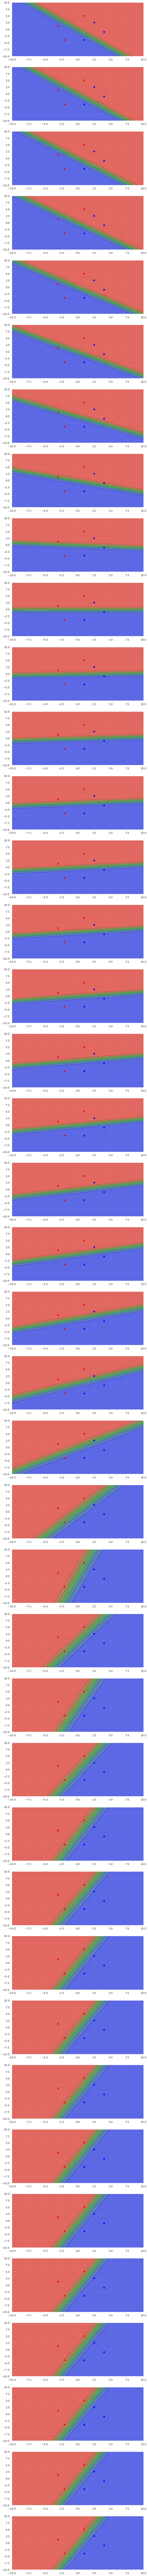

In [0]:
sn.fit(X,Y,1,0.6,True)
num_epochs=40
plt.figure(figsize=(10,num_epochs*5))
for i in range(num_epochs):
  print(sn.w,sn.b)
  ax=plt.subplot(num_epochs,1,i+1)
  plot_sigmoid(X,Y,sn,ax)
  sn.fit(X,Y,1,0.6,False)
  

Here we are observing that classification is getting better over increasing epochs.